### PART A
#### DOMAIN: Electronics and Telecommunication
#### CONTEXT:
A communications equipment manufacturing company has a product which is responsible for emitting informative signals. Company wants to build a machine learning model which can help the company to predict the equipment’s signal quality using various parameters.
#### DATA DESCRIPTION:
The data set contains information on various signal tests performed:
  Parameters: Various measurable signal parameters.
  Signal_Quality: Final signal strength or quality
#### PROJECT OBJECTIVE:
To build a classifier which can use the given parameters to determine the signal strength or quality

#### Data import and Understanding.
##### Q1A:Read the ‘Signals.csv’ as DataFrame and import required libraries.

In [2]:
!pip install keras==2.15.0
!pip install scikeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 75.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 35.6 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.3.3 which is incompatible.


In [3]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn import model_selection
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
import warnings
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dense, Input, Dropout,BatchNormalization
#from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from scikeras.wrappers import KerasClassifier
import random
from tensorflow.keras import backend
random.seed(1)
np.random.seed(1)
tf.random.set_seed(1)
warnings.filterwarnings("ignore")

In [5]:
#signal_df = pd.read_csv('/content/drive/MyDrive/Notebook/Data.csv')
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
signal_df = pd.read_csv('/content/drive/MyDrive/AIML_Program/Neaural Networks/Project/Signal.csv')

In [7]:
signal_df.head()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [8]:
# Lets copy the original df to another.
df = signal_df.copy()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Parameter 1      1599 non-null   float64
 1   Parameter 2      1599 non-null   float64
 2   Parameter 3      1599 non-null   float64
 3   Parameter 4      1599 non-null   float64
 4   Parameter 5      1599 non-null   float64
 5   Parameter 6      1599 non-null   float64
 6   Parameter 7      1599 non-null   float64
 7   Parameter 8      1599 non-null   float64
 8   Parameter 9      1599 non-null   float64
 9   Parameter 10     1599 non-null   float64
 10  Parameter 11     1599 non-null   float64
 11  Signal_Strength  1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


- There are total 1599 observations in the signal dataset.
- Target feature(signal strength) is of type int64 and other features are of type float64.

##### Q1B: Check for missing values and print percentage for each attribute.

In [10]:
# Let's check for missing values in the data
missing_per = round(df.isnull().sum() / df.isnull().count() * 100, 2)
missing_per

Parameter 1        0.0
Parameter 2        0.0
Parameter 3        0.0
Parameter 4        0.0
Parameter 5        0.0
Parameter 6        0.0
Parameter 7        0.0
Parameter 8        0.0
Parameter 9        0.0
Parameter 10       0.0
Parameter 11       0.0
Signal_Strength    0.0
dtype: float64

- It seems there are no missing values in the entire dataset.

##### Q1C:  Check for presence of duplicate records in the dataset and impute with appropriate method.

In [11]:
# Let's check for duplicate values in the data
df.duplicated().sum()

240

- There are about 240 duplicate observations/rows.

In [12]:
# Lets remove the duplicate rows. We have chosen to remove the duplicate records as an impute method.
df = df.drop_duplicates()

In [13]:
# Let's check again for duplicate values in the data.
df.duplicated().sum()

0

- All duplicate rows has been removed.

In [14]:
df.head(10)

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5
10,6.7,0.58,0.08,1.8,0.097,15.0,65.0,0.9959,3.28,0.54,9.2,5


In [15]:
df.shape

(1359, 12)

In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Parameter 1,1359.0,8.310596,1.736990,4.60000,7.1000,7.9000,9.20000,15.90000
Parameter 2,1359.0,0.529478,0.183031,0.12000,0.3900,0.5200,0.64000,1.58000
Parameter 3,1359.0,0.272333,0.195537,0.00000,0.0900,0.2600,0.43000,1.00000
Parameter 4,1359.0,2.523400,1.352314,0.90000,1.9000,2.2000,2.60000,15.50000
Parameter 5,1359.0,0.088124,0.049377,0.01200,0.0700,0.0790,0.09100,0.61100
Parameter 6,1359.0,15.893304,10.447270,1.00000,7.0000,14.0000,21.00000,72.00000
Parameter 7,1359.0,46.825975,33.408946,6.00000,22.0000,38.0000,63.00000,289.00000
Parameter 8,1359.0,0.996709,0.001869,0.99007,0.9956,0.9967,0.99782,1.00369
Parameter 9,1359.0,3.309787,0.155036,2.74000,3.2100,3.3100,3.40000,4.01000
Parameter 10,1359.0,0.658705,0.170667,0.33000,0.5500,0.6200,0.73000,2.00000


- The new dataset contains 1359 rows after removing duplicates.

#### Q1D: Visualise distribution of the target variable.

In [17]:
# Let's check the number of unique values in each column
df.nunique()

Parameter 1         96
Parameter 2        143
Parameter 3         80
Parameter 4         91
Parameter 5        153
Parameter 6         60
Parameter 7        144
Parameter 8        436
Parameter 9         89
Parameter 10        96
Parameter 11        65
Signal_Strength      6
dtype: int64

In [18]:
#Lets check the values in Target feature(Signal strength).
df['Signal_Strength'].value_counts()

Signal_Strength
5    577
6    535
7    167
4     53
8     17
3     10
Name: count, dtype: int64

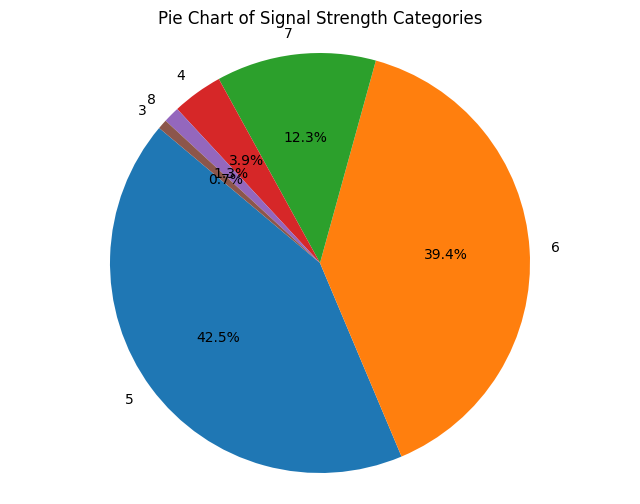

In [19]:
# Count the frequency of each label
label_counts = df['Signal_Strength'].value_counts()

# Plot pie chart for Target (signal strength) feature distribution.
plt.figure(figsize=(8, 6))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart of Signal Strength Categories')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

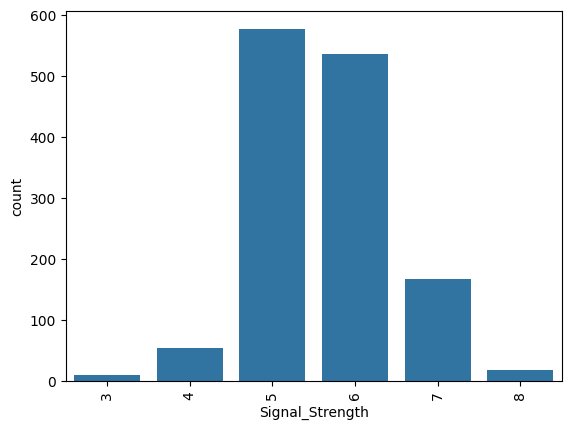

In [20]:
# Lets see the count plot distribution of Target column
sns.countplot(data=df,x='Signal_Strength')
plt.xticks(rotation=90)
plt.show()

- Target feature(signal strength) labels are normally distributed.
- There are total 6 labels(3,4,5,6,7,8) indicating various signal strengths.

#### Q1E: Share insights from the initial data analysis

- Initial data set contained no missing values.
- However dataset had huge duplicate records. data is imputed by removing the duplicate records.
- Target feature(signal strength) contained 6 labels and all the values were normally distributed.
- Most of the signals have signal level 5 and 6.

### 2. Data Preprocessing.
#### Q2A: Split the data into X & Y

In [21]:
## Separating Independent and Dependent Columns
X = df.drop(['Signal_Strength'],axis=1)
Y = df[['Signal_Strength']]

#### Q2B: Split the data into train & test with 70:30 proportion

In [22]:
# Splitting the dataset into the Training and Testing set.

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3, random_state = 42,stratify = Y)

#### Q3C: Print shape of all the 4 variables and verify if train and test data is in sync.

In [23]:
row,column=X_train.shape
print('The X Train dataset contains', row, 'rows and', column, 'columns')
row,column=X_test.shape
print('The X Test dataset contains', row, 'rows and', column, 'columns')
row,column=y_train.shape
print('The y Train dataset contains', row, 'rows and', column, 'columns')
row,column=y_test.shape
print('The y Test dataset contains', row, 'rows and', column, 'columns')

The X Train dataset contains 951 rows and 11 columns
The X Test dataset contains 408 rows and 11 columns
The y Train dataset contains 951 rows and 1 columns
The y Test dataset contains 408 rows and 1 columns


In [24]:
  # Verify if the target labels are consistent between train and test.
  y_train_unique = y_train['Signal_Strength'].unique()
  y_test_unique = y_test['Signal_Strength'].unique()
  if set(y_train_unique) != set(y_test_unique):
        print(f"Unique values for target column are not consistent between train and test sets.")
  print(f"Unique values for target column are consistent between train and test sets.")

Unique values for target column are consistent between train and test sets.


#### 2D: Normalise the train and test data with appropriate method.

In [25]:
from sklearn.preprocessing import StandardScaler

# Scaling training data
X_train_S = StandardScaler().fit_transform(X_train)

# Scaling testing data
X_test_S = StandardScaler().fit_transform(X_test)

In [26]:
X_train_S = X_train_S.reshape((X_train.shape[0], -1))
X_test_S = X_test_S.reshape((X_test.shape[0], -1))

#### Q2E: Transform Labels into format acceptable by Neural Network

In [27]:
# convert y data into categorical (one-hot encoding). Since the signal level stars from 3 but one hot
# encoding api takes range from 0, we need to bring the range from 0 to 5 by subtracting 3.
from keras.utils import to_categorical
y_train_c = to_categorical(np.asarray(y_train)-3)
y_test_c = to_categorical(np.asarray(y_test)-3)

In [28]:
y_test_c[0]

array([0., 0., 1., 0., 0., 0.])

### 3:Model Training & Evaluation using Neural Network.
#### Q3A: Design a Neural Network to train a classifier

In [29]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [30]:
# Initializing the ANN
model = Sequential()
# The amount of nodes (dimensions) in hidden layer should be the average of input and output layers, in this case 64.
# This adds the input layer (by specifying input dimension) AND the first hidden layer (units)
model.add(Dense(activation = 'relu', input_dim = 11, units=64))
#Add 1st hidden layer
model.add(Dense(32, activation='relu'))
# Adding the output layer
# Notice that we do not need to specify input dim.
# we have an output of 6 nodes(6 labels), which is the the desired dimensions of our output (signal levels)
# We use the softmax.
model.add(Dense(6, activation = 'softmax'))

In [31]:
# Create optimizer with default learning rate
# Compile the model
model.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])

In [32]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 6)                   │             198 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,046 (11.90 KB)

 Trainable params: 3,046 (11.90 KB)

 Non-trainable params: 0 (0.00 B)

#### Q3B:  Train the classifier using previously designed Architecture.


In [33]:
history=model.fit(X_train_S, y_train_c,
          validation_split=0.2,
          epochs=50,
          batch_size=32,verbose=1)

Epoch 1/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.2862 - loss: 0.6825 - val_accuracy: 0.3141 - val_loss: 0.6629
Epoch 2/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3286 - loss: 0.6610 - val_accuracy: 0.3717 - val_loss: 0.6429
Epoch 3/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3601 - loss: 0.6409 - val_accuracy: 0.4136 - val_loss: 0.6241
Epoch 4/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3775 - loss: 0.6220 - val_accuracy: 0.4241 - val_loss: 0.6061
Epoch 5/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3934 - loss: 0.6039 - val_accuracy: 0.4293 - val_loss: 0.5889
Epoch 6/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4076 - loss: 0.5864 - val_accuracy: 0.4346 - val_loss: 0.5722
Epoch 7/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4153 - loss: 0.5695 - val_accuracy: 0.4503 - val_loss: 0.5562
Epoch 8/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4327 - loss: 0.5533 - val_accuracy: 0.4660 - val_loss

#### Q3C: Plot 2 separate visuals.
- i. Training Loss and Validation Loss
- ii. Training Accuracy and Validation Accuracy

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5051 - loss: 0.3255 


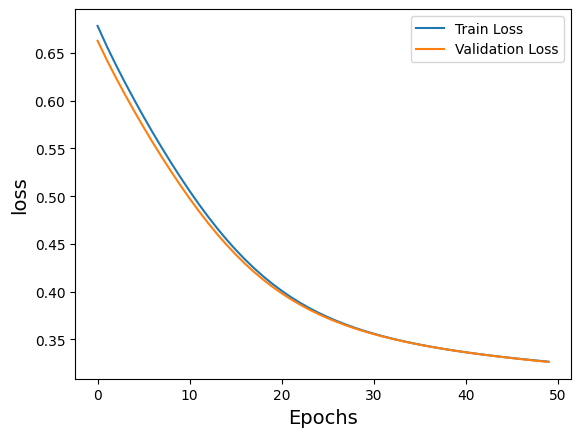

In [34]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

# Labeling the axes
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('loss', fontsize=14)

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("Train Loss" , "Validation Loss") , loc =0)

#Printing results
results = model.evaluate(X_test_S, y_test_c)

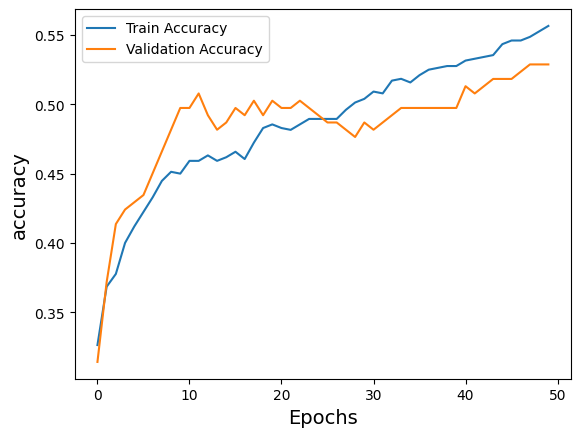

In [35]:
# Labeling the axes
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('accuracy', fontsize=14)

# Plotting accuracy at different epochs
plt.plot(hist['accuracy'])
plt.plot(hist['val_accuracy'])
plt.legend(("Train Accuracy" , "Validation Accuracy") , loc =0)


- W.r.t loss, its observed that model doesnt seem to have any noise both in training and validation stages which is good.
-  W.r.t accuracy, we could observe noise along the path during validation stage although it doesnt seem to be too much overfitting.
- Accuracy stands at 51 with the base model of 1 hidden, input and output layer.

In [36]:
y_pred=model.predict(X_test_S)
y_pred

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


array([[0.01482396, 0.02656087, 0.5998422 , 0.27574813, 0.06029893,
        0.02272582],
       [0.03230996, 0.06653544, 0.43536076, 0.28660378, 0.13998507,
        0.0392049 ],
       [0.0392868 , 0.05452302, 0.23530413, 0.46959922, 0.15186362,
        0.04942324],
       ...,
       [0.02959858, 0.07757464, 0.34108812, 0.2894745 , 0.21949196,
        0.04277225],
       [0.00648117, 0.01166305, 0.46251455, 0.47488272, 0.03439323,
        0.01006518],
       [0.01621721, 0.02843572, 0.6334807 , 0.24322228, 0.05666794,
        0.0219761 ]], dtype=float32)

In [37]:
#Accuracy as per the classification report
from sklearn import metrics
y_pred=model.predict(X_test_S)
y_pred=np.argmax(y_pred, axis=1)
y_test_c=np.argmax(y_test_c, axis=1)
cm = confusion_matrix(y_test_c, y_pred)
print(cm)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
[[  0   0   3   0   0   0]
 [  0   0  15   1   0   0]
 [  0   0 152  21   0   0]
 [  0   0 103  58   0   0]
 [  0   0  13  37   0   0]
 [  0   0   2   3   0   0]]


In [38]:
cr=metrics.classification_report(y_test_c,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.00      0.00      0.00        16
           2       0.53      0.88      0.66       173
           3       0.48      0.36      0.41       161
           4       0.00      0.00      0.00        50
           5       0.00      0.00      0.00         5

    accuracy                           0.51       408
   macro avg       0.17      0.21      0.18       408
weighted avg       0.41      0.51      0.44       408



#### Q3D: . Design new architecture/update existing architecture in attempt to improve the performance of the model.
#### Q3E: Plot visuals as in Q3.C and share insights about difference observed in both the models.

#### MODEL 2:

In [39]:
y_train_c = to_categorical(np.asarray(y_train)-3)
y_test_c = to_categorical(np.asarray(y_test)-3)

In [40]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [41]:
model1 = Sequential()
      #Adding the hidden and output layers
model1.add(Dense(128,activation='relu',kernel_initializer='he_uniform',input_dim = 11))
model1.add(Dense(64,activation='relu',kernel_initializer='he_uniform'))
model1.add(Dense(32,activation='relu',kernel_initializer='he_uniform'))
model1.add(Dense(16,activation='relu',kernel_initializer='he_uniform'))
model1.add(Dense(6, activation = 'softmax'))
      #Compiling the ANN with Adam optimizer and categorical cross entropy loss function
optimizer = tf.keras.optimizers.Adam(0.001)
model1.compile(loss='categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [42]:
model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           1,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 6)                   │             102 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,502 (48.84 KB)

 Trainable params: 12,502 (48.84 KB)

 Non-trainable params: 0 (0.00 B)

In [43]:
history1 = model1.fit(X_train_S,y_train_c,batch_size=64,epochs=50,verbose=1,validation_split = 0.2)

Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.3826 - loss: 1.5597 - val_accuracy: 0.5236 - val_loss: 1.3300
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5531 - loss: 1.2476 - val_accuracy: 0.5288 - val_loss: 1.2318
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5715 - loss: 1.1230 - val_accuracy: 0.5759 - val_loss: 1.1417
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5932 - loss: 1.0371 - val_accuracy: 0.5497 - val_loss: 1.0874
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6261 - loss: 0.9822 - val_accuracy: 0.5550 - val_loss: 1.0646
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6586 - loss: 0.9463 - val_accuracy: 0.5707 - val_loss: 1.0446
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6585 - loss: 0.9135 - val_accuracy: 0.5916 - val_loss: 1.0379
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6691 - loss: 0.8874 - val_accuracy: 0.6021 - val_loss

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6073 - loss: 1.4895 


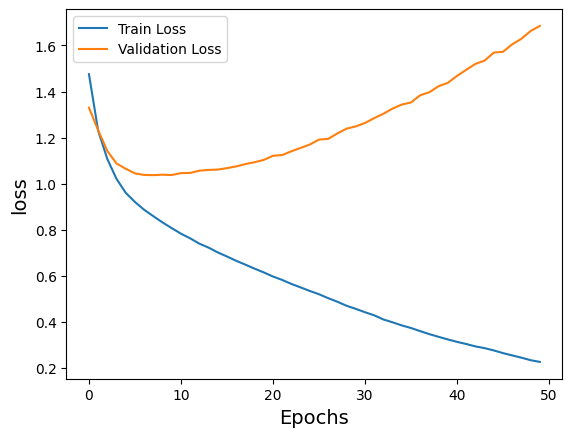

In [44]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history1.history)
hist['epoch'] = history1.epoch

# Labeling the axes
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('loss', fontsize=14)

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("Train Loss" , "Validation Loss") , loc =0)

#Printing results
results = model1.evaluate(X_test_S, y_test_c)

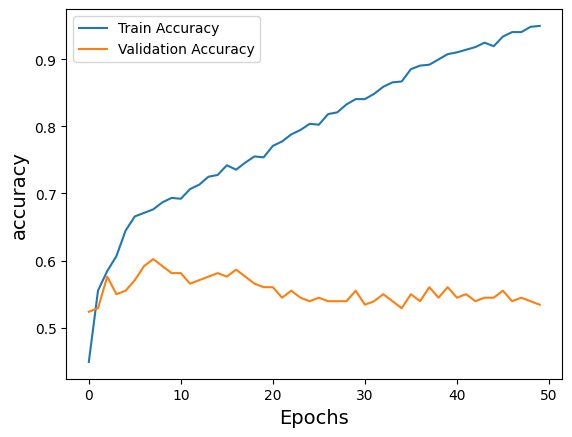

In [45]:
# Labeling the axes
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('accuracy', fontsize=14)

# Plotting accuracy at different epochs
plt.plot(hist['accuracy'])
plt.plot(hist['val_accuracy'])
plt.legend(("Train Accuracy" , "Validation Accuracy") , loc =0)

In [46]:
y_pred=model1.predict(X_test_S)
y_pred

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


array([[5.8305290e-05, 3.7060727e-04, 7.4984312e-01, 2.4965115e-01,
        7.6782417e-05, 3.3769926e-08],
       [1.9379625e-04, 5.4810685e-03, 9.9687159e-02, 8.8490635e-01,
        9.7072162e-03, 2.4418847e-05],
       [4.2183137e-07, 2.0109235e-06, 3.1566124e-03, 7.2051561e-01,
        2.0044236e-01, 7.5883053e-02],
       ...,
       [5.8107136e-04, 1.3130285e-02, 5.0466186e-03, 3.3432418e-03,
        9.7789186e-01, 7.0092046e-06],
       [4.3886301e-11, 3.1562390e-08, 1.0559438e-03, 9.9873596e-01,
        2.0810045e-04, 3.5482672e-09],
       [3.8247634e-04, 3.5412483e-02, 4.6346417e-01, 5.0037217e-01,
        3.6439198e-04, 4.3026985e-06]], dtype=float32)

In [47]:
#Accuracy as per the classification report
from sklearn import metrics
y_pred=model1.predict(X_test_S)
y_pred=np.argmax(y_pred, axis=1)
y_test_c=np.argmax(y_test_c, axis=1)
cm = confusion_matrix(y_test_c, y_pred)
print(cm)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
[[  0   1   1   1   0   0]
 [  1   1  10   3   1   0]
 [  1   3 115  47   7   0]
 [  0   5  42  95  19   0]
 [  0   0   3  20  26   1]
 [  0   0   0   1   4   0]]


In [48]:
cr=metrics.classification_report(y_test_c,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.10      0.06      0.08        16
           2       0.67      0.66      0.67       173
           3       0.57      0.59      0.58       161
           4       0.46      0.52      0.49        50
           5       0.00      0.00      0.00         5

    accuracy                           0.58       408
   macro avg       0.30      0.31      0.30       408
weighted avg       0.57      0.58      0.57       408



- With Adam optimizer and additional hidden layers, loss had increased on validation set after few epochs while accuracy started reducing for the same set.
- This model is highly overfit as training accuracy is quite high but validation accuracy is quite low and hence this model cannot be considered.

#### MODEL 3

In [49]:
y_train_c = to_categorical(np.asarray(y_train)-3)
y_test_c = to_categorical(np.asarray(y_test)-3)

In [50]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [51]:
model2 = Sequential()
model2.add(Dense(128,activation='relu',input_dim = 11))
model2.add(BatchNormalization())
model2.add(Dense(64,activation='relu',kernel_initializer='he_uniform'))
model2.add(BatchNormalization())
model2.add(Dense(32,activation='relu',kernel_initializer='he_uniform'))
model2.add(Dense(6, activation = 'softmax'))

In [52]:
model2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           1,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 6)                   │             198 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,838 (50.15 KB)

 Trainable params: 12,454 (48.65 KB)

 Non-trainable params: 384 (1.50 KB)

In [53]:
optimizer = tf.keras.optimizers.Adam(0.001)
model2.compile(loss='categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [54]:
history_2 = model2.fit(X_train_S,y_train_c,batch_size=64,epochs=50,verbose=1,validation_split = 0.2)

Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.1501 - loss: 2.2665 - val_accuracy: 0.4607 - val_loss: 1.6503
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4837 - loss: 1.4128 - val_accuracy: 0.5131 - val_loss: 1.5783
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5944 - loss: 1.1369 - val_accuracy: 0.4921 - val_loss: 1.5161
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6391 - loss: 0.9905 - val_accuracy: 0.5340 - val_loss: 1.4581
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6870 - loss: 0.9010 - val_accuracy: 0.5288 - val_loss: 1.4059
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7109 - loss: 0.8363 - val_accuracy: 0.5079 - val_loss: 1.3569
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7260 - loss: 0.7857 - val_accuracy: 0.4974 - val_loss: 1.3153
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7493 - loss: 0.7417 - val_accuracy: 0.5079 - val_loss

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5357 - loss: 1.8161 


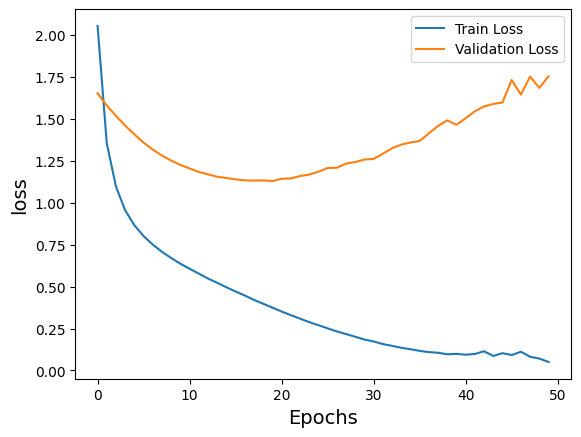

In [55]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history_2.history)
hist['epoch'] = history_2.epoch

# Labeling the axes
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('loss', fontsize=14)

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("Train Loss" , "Validation Loss") , loc =0)

#Printing results
results = model2.evaluate(X_test_S, y_test_c)

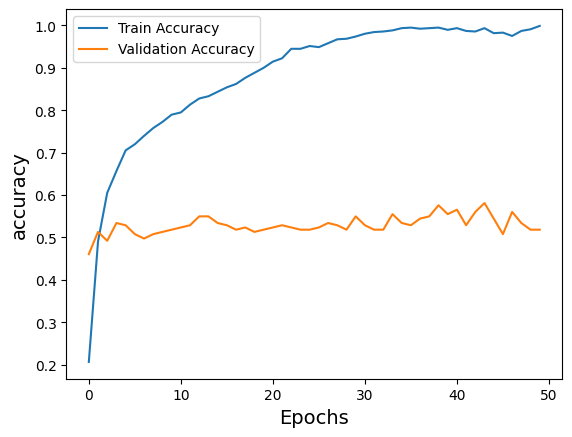

In [56]:
# Labeling the axes
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('accuracy', fontsize=14)

# Plotting accuracy at different epochs
plt.plot(hist['accuracy'])
plt.plot(hist['val_accuracy'])
plt.legend(("Train Accuracy" , "Validation Accuracy") , loc =0)

In [57]:
#Accuracy as per the classification report
from sklearn import metrics
y_pred=model2.predict(X_test_S)
y_pred=np.argmax(y_pred, axis=1)
y_test_c=np.argmax(y_test_c, axis=1)
cm = confusion_matrix(y_test_c, y_pred)
print(cm)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
[[  0   0   3   0   0   0]
 [  0   0  11   4   1   0]
 [  0   3 119  38  13   0]
 [  0   3  58  70  29   1]
 [  0   1   6  18  23   2]
 [  0   0   0   1   4   0]]


In [58]:
cr=metrics.classification_report(y_test_c,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.00      0.00      0.00        16
           2       0.60      0.69      0.64       173
           3       0.53      0.43      0.48       161
           4       0.33      0.46      0.38        50
           5       0.00      0.00      0.00         5

    accuracy                           0.52       408
   macro avg       0.24      0.26      0.25       408
weighted avg       0.51      0.52      0.51       408



- Model3 with Batchnormalization had fared very badly as loss increased and accuracy decreased on validation set.
- This model is highly overfit and is rejected outright.

#### MODEL 4

In [59]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [60]:
y_train_c = to_categorical(np.asarray(y_train)-3)
y_test_c = to_categorical(np.asarray(y_test)-3)

In [61]:
model3 = Sequential()
model3.add(Dense(256,activation='relu',input_dim = 11))
model3.add(Dropout(0.2))
model3.add(Dense(128,activation='relu'))
model3.add(Dropout(0.2))
model3.add(Dense(64,activation='relu'))
model3.add(Dropout(0.2))
model3.add(Dense(32,activation='relu'))
model3.add(Dense(6, activation = 'softmax'))

In [62]:
model3.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 256)                 │           3,072 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 6)                   │             198 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 46,502 (181.65 KB)

 Trainable params: 46,502 (181.65 KB)

 Non-trainable params: 0 (0.00 B)

In [63]:
optimizer = tf.keras.optimizers.Adam(0.001)
model3.compile(loss='categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [64]:
history_3 = model3.fit(X_train_S,y_train_c,batch_size=64,epochs=50,verbose=1,validation_split = 0.2)

Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.4079 - loss: 1.5839 - val_accuracy: 0.3979 - val_loss: 1.2836
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4745 - loss: 1.2419 - val_accuracy: 0.5550 - val_loss: 1.1115
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5707 - loss: 1.1256 - val_accuracy: 0.5916 - val_loss: 1.0292
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5796 - loss: 1.0788 - val_accuracy: 0.6073 - val_loss: 0.9896
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5492 - loss: 1.0499 - val_accuracy: 0.6230 - val_loss: 0.9775
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5805 - loss: 1.0263 - val_accuracy: 0.6021 - val_loss: 0.9710
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5625 - loss: 1.0245 - val_accuracy: 0.6126 - val_loss: 0.9668
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5725 - loss: 0.9768 - val_accuracy: 0.5812 - val_loss

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5912 - loss: 1.2329 


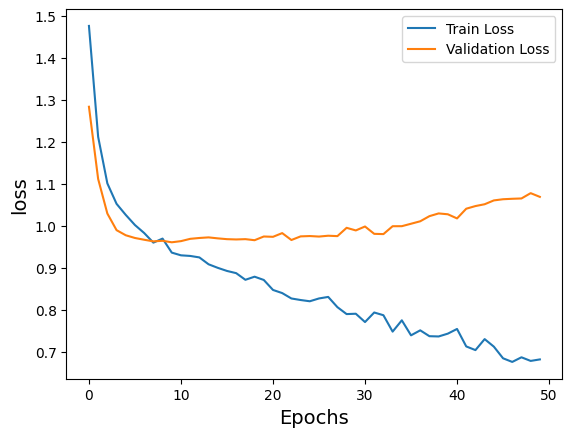

In [65]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history_3.history)
hist['epoch'] = history_3.epoch

# Labeling the axes
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('loss', fontsize=14)

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("Train Loss" , "Validation Loss") , loc =0)

#Printing results
results = model3.evaluate(X_test_S, y_test_c)

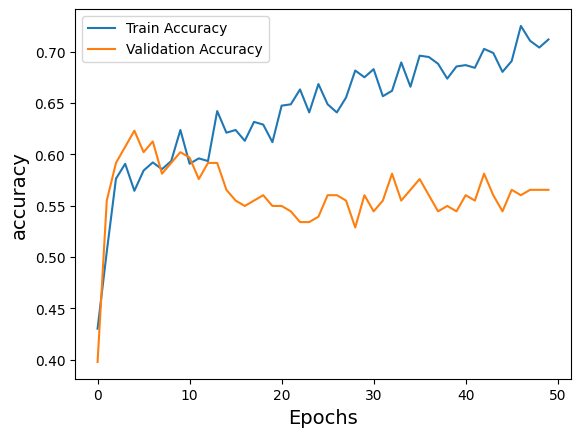

In [66]:
# Labeling the axes
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('accuracy', fontsize=14)

# Plotting accuracy at different epochs
plt.plot(hist['accuracy'])
plt.plot(hist['val_accuracy'])
plt.legend(("Train Accuracy" , "Validation Accuracy") , loc =0)

In [67]:
#Accuracy as per the classification report
from sklearn import metrics
y_pred=model2.predict(X_test_S)
y_pred=np.argmax(y_pred, axis=1)
y_test_c=np.argmax(y_test_c, axis=1)
cm = confusion_matrix(y_test_c, y_pred)
print(cm)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
[[  0   0   3   0   0   0]
 [  0   0  11   4   1   0]
 [  0   3 119  38  13   0]
 [  0   3  58  70  29   1]
 [  0   1   6  18  23   2]
 [  0   0   0   1   4   0]]


In [68]:
cr=metrics.classification_report(y_test_c,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.00      0.00      0.00        16
           2       0.60      0.69      0.64       173
           3       0.53      0.43      0.48       161
           4       0.33      0.46      0.38        50
           5       0.00      0.00      0.00         5

    accuracy                           0.52       408
   macro avg       0.24      0.26      0.25       408
weighted avg       0.51      0.52      0.51       408




#### Observations/Insights/Inferences:


- We have used total 4 models in total in an attempt to improve the performance over the base model.
- Model1 : With input, output, hidden layer, SGD optimizer.
- Model2 : With input and output, multiple hidden layers, Adam optimizer.
- Model 3: With batch normalization and other hidden layers same.
- Model 4: With dropout and other optimizer, loss function and hidden layers same.
- Plotted the visuals for loss  and accuracy between Training set and Validation set in earlier section for reference.
- Out of all the 4 models tried, it seems the base model turned out to be performing better with decent accuracy at 51%, no over fitting, no noise in vallidation set.
- Rest other models fared badly to very badly with these models very highly over fitting and adding noise sometimes to the validation set besides high loss and less accuracy on validation set.

#### So base model with one hidden layer, input and output layer, SGD optimizer seems to be good model to go with.

### ****************** END OF PROJECT A ***************